# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "document/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "https://api.openweathermap.org/data/2.5/weather?q=" + city + "&appid=" + weather_api_key
test_response = requests.get(url)
#print(test_response, url)

i = 1
city_holder = []
set_count = 1

for city in cities:
    try:
        if i == 50:
            set_count = set_count + 1
            i = 0
        print("Processing Record " + str(i) + " of Set " + str(set_count) + " | " + (city))
        url = "https://api.openweathermap.org/data/2.5/weather?q=" + city + "&appid=" + weather_api_key
        i= i + 1
    
    
        weather_response = requests.get(url)
        test_response = weather_response.json()

        #print(url)

        cloud = test_response["clouds"]["all"]
        country = test_response["sys"]["country"]
        date = test_response["dt"]
        humidity = test_response["main"]["humidity"]
        lat = test_response["coord"]["lat"]
        lng = test_response["coord"]["lon"]
        Max_temp = test_response["main"]["temp_max"]
        Wind_speed = test_response["wind"]["speed"]

        city_holder.append({"City" : city, "Cloudiness" : cloud, "Country": country, 
                            "Date" : date, "Humidity" : humidity, "Lat" : lat, "Lng" : lng, 
                            "Max Temp" : Max_temp, "Wind Speed" : Wind_speed})
        city_holder
    except: 
        print(city + "not found. Skipping...")
        pass
    

Processing Record 1 of Set 1| port blair
Processing Record 2 of Set 1| ushuaia
Processing Record 3 of Set 1| vaini
Processing Record 4 of Set 1| portland
Processing Record 5 of Set 1| xinxiang
Processing Record 6 of Set 1| pangnirtung
Processing Record 7 of Set 1| novyy urengoy
Processing Record 8 of Set 1| rayevskiy
Processing Record 9 of Set 1| mar del plata
Processing Record 10 of Set 1| suzu
suzunot found. Skipping...
Processing Record 11 of Set 1| cazaje
cazajenot found. Skipping...
Processing Record 12 of Set 1| hasaki
Processing Record 13 of Set 1| tautira
Processing Record 14 of Set 1| te anau
Processing Record 15 of Set 1| banepa
Processing Record 16 of Set 1| hithadhoo
Processing Record 17 of Set 1| kawalu
Processing Record 18 of Set 1| faya
Processing Record 19 of Set 1| new norfolk
Processing Record 20 of Set 1| kananga
Processing Record 21 of Set 1| albany
Processing Record 22 of Set 1| rikitea
Processing Record 23 of Set 1| hobart
Processing Record 24 of Set 1| cape town


Processing Record 43 of Set 4| tasiilaq
Processing Record 44 of Set 4| carlsbad
Processing Record 45 of Set 4| husavik
Processing Record 46 of Set 4| leningradskiy
Processing Record 47 of Set 4| hongjiang
Processing Record 48 of Set 4| guhagar
Processing Record 49 of Set 4| vostok
Processing Record 0 of Set 5| palasa
Processing Record 1 of Set 5| lebu
Processing Record 2 of Set 5| ponta delgada
Processing Record 3 of Set 5| batemans bay
Processing Record 4 of Set 5| sainte-marie
Processing Record 5 of Set 5| kaitangata
Processing Record 6 of Set 5| lakselv
Processing Record 7 of Set 5| qalyub
Processing Record 8 of Set 5| ayr
Processing Record 9 of Set 5| salalah
Processing Record 10 of Set 5| nikolskoye
Processing Record 11 of Set 5| takoradi
Processing Record 12 of Set 5| osypenko
Processing Record 13 of Set 5| san cristobal
Processing Record 14 of Set 5| dong hoi
Processing Record 15 of Set 5| lavrentiya
Processing Record 16 of Set 5| maniitsoq
Processing Record 17 of Set 5| tiksi
P

Processing Record 32 of Set 8| yulara
Processing Record 33 of Set 8| ostrovnoy
Processing Record 34 of Set 8| sorland
Processing Record 35 of Set 8| sambava
Processing Record 36 of Set 8| port macquarie
Processing Record 37 of Set 8| panzhihua
Processing Record 38 of Set 8| abu samrah
Processing Record 39 of Set 8| morden
Processing Record 40 of Set 8| emba
Processing Record 41 of Set 8| tubuala
Processing Record 42 of Set 8| karratha
Processing Record 43 of Set 8| barbastro
Processing Record 44 of Set 8| udachnyy
Processing Record 45 of Set 8| alyangula
Processing Record 46 of Set 8| port lincoln
Processing Record 47 of Set 8| marshall
Processing Record 48 of Set 8| bondoukou
Processing Record 49 of Set 8| cracow
Processing Record 0 of Set 9| esmeralda
Processing Record 1 of Set 9| cortez
Processing Record 2 of Set 9| samusu
samusunot found. Skipping...
Processing Record 3 of Set 9| inderborskiy
inderborskiynot found. Skipping...
Processing Record 4 of Set 9| lasa
Processing Record 5 

Processing Record 24 of Set 12| traverse city
Processing Record 25 of Set 12| tabas
Processing Record 26 of Set 12| cayhagan
Processing Record 27 of Set 12| oyama
Processing Record 28 of Set 12| komatipoort
Processing Record 29 of Set 12| port hardy
Processing Record 30 of Set 12| karauzyak
karauzyaknot found. Skipping...
Processing Record 31 of Set 12| bukama
Processing Record 32 of Set 12| hofn
Processing Record 33 of Set 12| belyy yar
Processing Record 34 of Set 12| komsomolskiy
Processing Record 35 of Set 12| cabedelo
Processing Record 36 of Set 12| bowen
Processing Record 37 of Set 12| gashua
Processing Record 38 of Set 12| rossano
Processing Record 39 of Set 12| hay river
Processing Record 40 of Set 12| tumannyy
tumannyynot found. Skipping...
Processing Record 41 of Set 12| astros
Processing Record 42 of Set 12| shenjiamen
Processing Record 43 of Set 12| nizhniy kuranakh
Processing Record 44 of Set 12| wasilla
Processing Record 45 of Set 12| puro
Processing Record 46 of Set 12| p

In [4]:
#city_holder

[{'City': 'port blair',
  'Cloudiness': 90,
  'Country': 'IN',
  'Date': 1586670507,
  'Humidity': 70,
  'Lat': 11.67,
  'Lng': 92.75,
  'Max Temp': 302.1,
  'Wind Speed': 2.14},
 {'City': 'ushuaia',
  'Cloudiness': 40,
  'Country': 'AR',
  'Date': 1586670284,
  'Humidity': 64,
  'Lat': -54.8,
  'Lng': -68.3,
  'Max Temp': 277.15,
  'Wind Speed': 4.1},
 {'City': 'vaini',
  'Cloudiness': 40,
  'Country': 'TO',
  'Date': 1586670508,
  'Humidity': 74,
  'Lat': -21.2,
  'Lng': -175.2,
  'Max Temp': 299.15,
  'Wind Speed': 2.6},
 {'City': 'portland',
  'Cloudiness': 1,
  'Country': 'US',
  'Date': 1586670387,
  'Humidity': 57,
  'Lat': 45.52,
  'Lng': -122.68,
  'Max Temp': 285.15,
  'Wind Speed': 3.1},
 {'City': 'xinxiang',
  'Cloudiness': 0,
  'Country': 'CN',
  'Date': 1586670509,
  'Humidity': 18,
  'Lat': 35.31,
  'Lng': 113.87,
  'Max Temp': 296.09,
  'Wind Speed': 6.32},
 {'City': 'pangnirtung',
  'Cloudiness': 100,
  'Country': 'CA',
  'Date': 1586670509,
  'Humidity': 89,
  'Lat': 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
test_city = pd.DataFrame(city_holder)
test_city.head(10)

City  Cloudiness Country        Date  Humidity    Lat     Lng  \
0     port blair          90      IN  1586670507        70  11.67   92.75   
1        ushuaia          40      AR  1586670284        64 -54.80  -68.30   
2          vaini          40      TO  1586670508        74 -21.20 -175.20   
3       portland           1      US  1586670387        57  45.52 -122.68   
4       xinxiang           0      CN  1586670509        18  35.31  113.87   
5    pangnirtung         100      CA  1586670509        89  66.15  -65.71   
6  novyy urengoy          99      RU  1586670509        95  66.08   76.63   
7      rayevskiy         100      RU  1586670510        58  54.07   54.95   
8  mar del plata         100      AR  1586670331        93 -38.00  -57.56   
9         hasaki          75      JP  1586670511        66  35.73  140.83   

   Max Temp  Wind Speed  
0    302.10        2.14  
1    277.15        4.10  
2    299.15        2.60  
3    285.15        3.10  
4    296.09        6.32  
5    268.88        4.21  
6    267.15        3.13  
7    281.82        5.28  
8    287.59        1.50  
9    288.15        5.70

In [6]:
test_city.to_csv("RandomCities.csv")

In [7]:
from datetime import datetime
date = datetime.date(datetime.now())
print(date)

2020-04-11


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

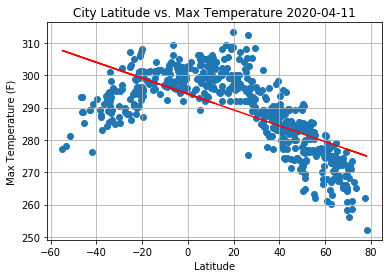

In [16]:
# t_slope, t_int, t_r, t_p, t_std_err = stats.linregress(latitude, temp)
# t_fit = t_slope * latitude + t_int
#line_equation_t = "y = " + str(t_slope) + "x +" + str(t_int)


latitude = test_city.iloc[:,5]
temp = test_city.iloc[:,7]
t_slope, t_int, t_r, t_p, t_std_err = stats.linregress(latitude, temp)
t_fit = t_slope * latitude + t_int
plt.scatter(latitude, temp)
plt.plot(latitude,t_fit,"r")#label='y={:.2f}x+{:.2f}'.format(t_slope,t_int))
#plt.annotate(line_equation_t,(5,10),fontsize=5)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title("City Latitude vs. Max Temperature " + str(date))
plt.grid()
#how to add current date
plt.savefig("City Latitude vs Max Temperature.png")
plt.show()

#### Latitude vs. Humidity Plot

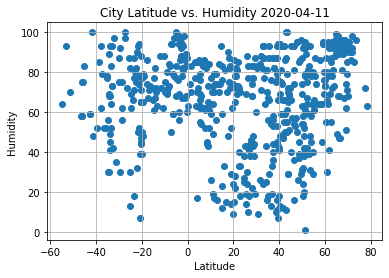

In [11]:
latitude = test_city.iloc[:,5]
humidity = test_city.iloc[:,4]
plt.scatter(latitude, humidity)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("City Latitude vs. Humidity " + str(date))
#how to add current date
plt.grid()
plt.savefig("City Latitude vs Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

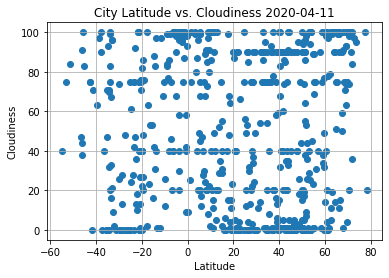

In [12]:
latitude = test_city.iloc[:,5]
cloudiness = test_city.iloc[:,1]
plt.scatter(latitude, cloudiness)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f"City Latitude vs. Cloudiness {date}")
#how to add current date
plt.grid()
plt.savefig("City Latitude vs Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

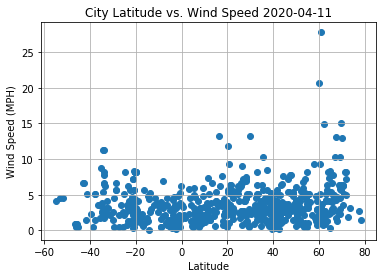

In [23]:
latitude = test_city.iloc[:,5]
wind_speed = test_city.iloc[:,8]
plt.scatter(latitude, wind_speed)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.title(f"City Latitude vs. Wind Speed {date}")
#how to add current date
plt.grid()
plt.savefig("City Latitude vs Wind Speed.png")
plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [15]:
# Create Northern and Southern Hemisphere DataFrames

#north(greater than or equal to 0 degrees latitude)
northern_hem = test_city.loc[(test_city["Lat"]>=0)]
northern_hem


City  Cloudiness Country        Date  Humidity    Lat     Lng  \
0        port blair          90      IN  1586670507        70  11.67   92.75   
3          portland           1      US  1586670387        57  45.52 -122.68   
4          xinxiang           0      CN  1586670509        18  35.31  113.87   
5       pangnirtung         100      CA  1586670509        89  66.15  -65.71   
6     novyy urengoy          99      RU  1586670509        95  66.08   76.63   
..              ...         ...     ...         ...       ...    ...     ...   
571  drexel heights          90      US  1586670763        71  32.14 -111.03   
572        la rioja          74      ES  1586670764        93  42.25   -2.50   
574  gornopravdinsk          14      RU  1586670765        76  60.05   69.90   
576           senno           0      RU  1586670766        76  59.53   33.92   
577         talnakh          75      RU  1586670766        85  69.49   88.40   

     Max Temp  Wind Speed  
0      302.10        2.14  
3      285.15        3.10  
4      296.09        6.32  
5      268.88        4.21  
6      267.15        3.13  
..        ...         ...  
571    284.82        3.07  
572    284.15        2.10  
574    281.47        2.18  
576    274.96        1.36  
577    265.15       15.00  

[409 rows x 9 columns]

In [14]:
southern_hem = test_city.loc[(test_city["Lat"]<0)]
southern_hem

City  Cloudiness Country        Date  Humidity    Lat     Lng  \
1          ushuaia          40      AR  1586670284        64 -54.80  -68.30   
2            vaini          40      TO  1586670508        74 -21.20 -175.20   
8    mar del plata         100      AR  1586670331        93 -38.00  -57.56   
10         tautira         100      PF  1586670512        74 -17.73 -149.15   
11         te anau          83      NZ  1586670512        83 -45.42  167.72   
..             ...         ...     ...         ...       ...    ...     ...   
563        emerald           0      AU  1586670760        18 -23.53  148.17   
567           tena         100      EC  1586670762        67  -0.98  -77.82   
568       nokaneng          48      BW  1586670762        48 -19.67   22.27   
573           lima           1      PE  1586669888        88 -12.04  -77.03   
575         sorong          40      ID  1586670765        83  -0.88  131.25   

     Max Temp  Wind Speed  
1      277.15        4.10  
2      299.15        2.60  
8      287.59        1.50  
10     301.15        1.00  
11     285.37        0.46  
..        ...         ...  
563    305.15        6.20  
567    295.35        0.89  
568    295.28        1.30  
573    294.15        3.60  
575    301.90        2.02  

[169 rows x 9 columns]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

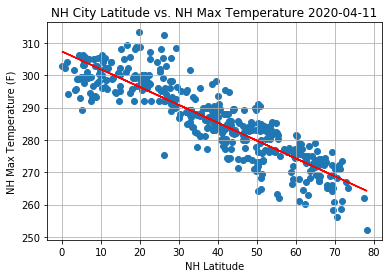

In [17]:
n_latitude = northern_hem.iloc[:,5]
n_temp = northern_hem.iloc[:,7]
nt_slope, nt_int, nt_r, nt_p, nt_std_err = stats.linregress(n_latitude, n_temp)
nt_fit = nt_slope * n_latitude + nt_int
plt.scatter(n_latitude, n_temp)
plt.plot(n_latitude,nt_fit,"r")#label='y={:.2f}x+{:.2f}'.format(t_slope,t_int))
#plt.annotate(line_equation_t,(5,10),fontsize=5)
plt.xlabel('NH Latitude')
plt.ylabel('NH Max Temperature (F)')
plt.title("NH City Latitude vs. NH Max Temperature " + str(date))
plt.grid()
#how to add current date
plt.savefig("NH City Latitude vs NH Max Temperature.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

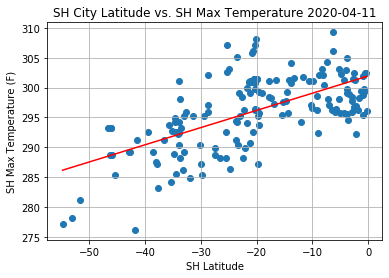

In [18]:
s_latitude = southern_hem.iloc[:,5]
s_temp = southern_hem.iloc[:,7]
st_slope, st_int, st_r, st_p, st_std_err = stats.linregress(s_latitude, s_temp)
st_fit = st_slope * s_latitude + st_int
plt.scatter(s_latitude, s_temp)
plt.plot(s_latitude,st_fit,"r")#label='y={:.2f}x+{:.2f}'.format(t_slope,t_int))
#plt.annotate(line_equation_t,(5,10),fontsize=5)
plt.xlabel('SH Latitude')
plt.ylabel('SH Max Temperature (F)')
plt.title("SH City Latitude vs. SH Max Temperature " + str(date))
plt.grid()
#how to add current date
plt.savefig("SH City Latitude vs SH Max Temperature.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

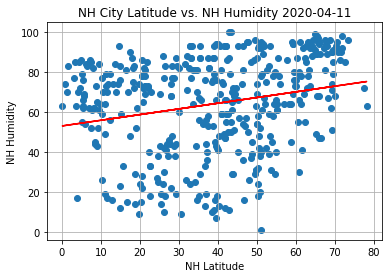

In [19]:
n_latitude = northern_hem.iloc[:,5]
n_humidity = northern_hem.iloc[:,4]
nh_slope, nh_int, nh_r, nh_p, nh_std_err = stats.linregress(n_latitude, n_humidity)
nh_fit = nh_slope * n_latitude + nh_int
plt.scatter(n_latitude, n_humidity)
plt.plot(n_latitude,nh_fit,"r")
plt.xlabel('NH Latitude')
plt.ylabel('NH Humidity')
plt.title("NH City Latitude vs. NH Humidity " + str(date))
#how to add current date
plt.grid()
plt.savefig("NH City Latitude vs NH Humidity.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

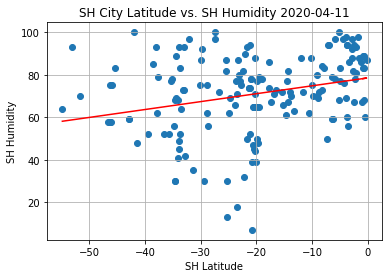

In [20]:
s_latitude = southern_hem.iloc[:,5]
s_humidity = southern_hem.iloc[:,4]
sh_slope, sh_int, sh_r, sh_p, sh_std_err = stats.linregress(s_latitude, s_humidity)
sh_fit = sh_slope * s_latitude + sh_int
plt.scatter(s_latitude, s_humidity)
plt.plot(s_latitude,sh_fit,"r")
plt.xlabel('SH Latitude')
plt.ylabel('SH Humidity')
plt.title("SH City Latitude vs. SH Humidity " + str(date))
#how to add current date
plt.grid()
plt.savefig("SH City Latitude vs SH Humidity.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

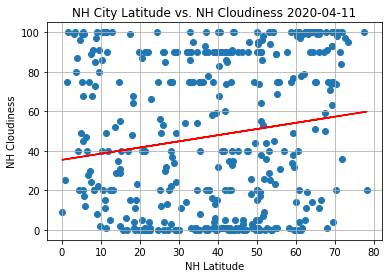

In [21]:
n_latitude = northern_hem.iloc[:,5]
n_cloudiness = northern_hem.iloc[:,1]
nc_slope, nc_int, nc_r, nc_p, nc_std_err = stats.linregress(n_latitude, n_cloudiness)
nc_fit = nc_slope * n_latitude + nc_int
plt.scatter(n_latitude, n_cloudiness)
plt.plot(n_latitude,nc_fit,"r")
plt.xlabel('NH Latitude')
plt.ylabel('NH Cloudiness')
plt.title(f"NH City Latitude vs. NH Cloudiness {date}")
#how to add current date
plt.grid()
plt.savefig("NH City Latitude vs NH Cloudiness.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

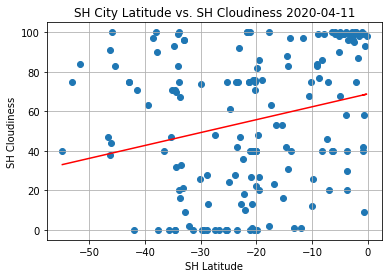

In [22]:
s_latitude = southern_hem.iloc[:,5]
s_cloudiness = southern_hem.iloc[:,1]
sc_slope, sc_int, sc_r, sc_p, sc_std_err = stats.linregress(s_latitude, s_cloudiness)
sc_fit = sc_slope * s_latitude + sc_int
plt.scatter(s_latitude, s_cloudiness)
plt.plot(s_latitude,sc_fit,"r")
plt.xlabel('SH Latitude')
plt.ylabel('SH Cloudiness')
plt.title(f"SH City Latitude vs. SH Cloudiness {date}")
#how to add current date
plt.grid()
plt.savefig("SH City Latitude vs SH Cloudiness.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

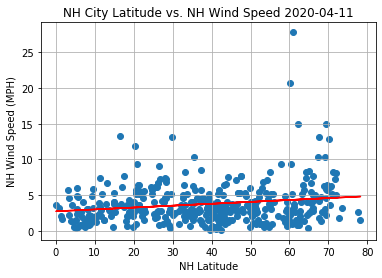

In [24]:
n_latitude = northern_hem.iloc[:,5]
n_wind_speed = northern_hem.iloc[:,8]
nw_slope, nw_int, nw_r, nw_p, nw_std_err = stats.linregress(n_latitude, n_wind_speed)
nw_fit = nw_slope * n_latitude + nw_int
plt.scatter(n_latitude, n_wind_speed)
plt.plot(n_latitude,nw_fit,"r")
plt.xlabel('NH Latitude')
plt.ylabel('NH Wind Speed (MPH)')
plt.title(f"NH City Latitude vs. NH Wind Speed {date}")
#how to add current date
plt.grid()
plt.savefig("NH City Latitude vs NH Wind Speed.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

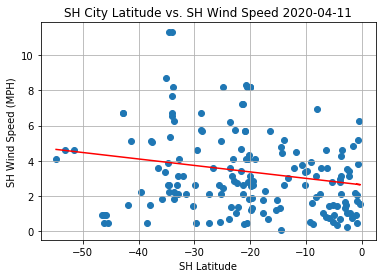

In [25]:
s_latitude = southern_hem.iloc[:,5]
s_wind_speed = southern_hem.iloc[:,8]
sw_slope, sw_int, sw_r, sw_p, sw_std_err = stats.linregress(s_latitude, s_wind_speed)
sw_fit = sw_slope * s_latitude + sw_int
plt.scatter(s_latitude, s_wind_speed)
plt.plot(s_latitude,sw_fit,"r")
plt.xlabel('SH Latitude')
plt.ylabel('SH Wind Speed (MPH)')
plt.title(f"SH City Latitude vs. SH Wind Speed {date}")
#how to add current date
plt.grid()
plt.savefig("SH City Latitude vs SH Wind Speed.png")
plt.show()

## Observation:
1. Based on the data we can see that cities closer to the equator tend to have warmer temperatures than cities near    the northern, and southern poles.
2. Our random sample generated more cities in the northern hemisphere than the southern hemisphere, perhaps there      is data to prove that the northern hemisphere is more populated than the southern hemisphere.
3. The Wind Speed in the northern hemispheres is more uniform than Wind Speed in the southern hemisphere. 